In [1]:

# https://min-api.cryptocompare.com/data/histohour?fsym=NEO&tsym=USD&limit=6000&aggregate=1

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
from bs4 import BeautifulSoup
import requests
from datetime import datetime, date, time, timedelta
import sched
import time as mod_time
from pandas.io.json import json_normalize

url = "https://api.coinmarketcap.com/v1/ticker/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
dic = json.loads(soup.prettify())
%matplotlib inline
# create an empty DataFrame
df = pd.DataFrame(columns=["Ticker", "MarketCap"])
 
for i in range(len(dic)):
    df.loc[len(df)] = [dic[i]['symbol'], dic[i]['market_cap_usd']]
 
df.sort_values(by=['MarketCap'])
P = df.iloc[:400]
P.head()
tickers = P['Ticker'].tolist()
tickers

[u'BTC',
 u'ETH',
 u'BCH',
 u'XRP',
 u'DASH',
 u'LTC',
 u'BTG',
 u'MIOTA',
 u'ADA',
 u'XMR',
 u'ETC',
 u'XEM',
 u'NEO',
 u'EOS',
 u'XLM',
 u'BCC',
 u'OMG',
 u'QTUM',
 u'LSK',
 u'ZEC',
 u'USDT',
 u'HSR',
 u'WAVES',
 u'STRAT',
 u'PPT',
 u'ARDR',
 u'NXT',
 u'ARK',
 u'MONA',
 u'REP',
 u'BCN',
 u'BTS',
 u'DCR',
 u'VTC',
 u'KMD',
 u'STEEM',
 u'PIVX',
 u'SALT',
 u'GNT',
 u'SC',
 u'SNT',
 u'POWR',
 u'DOGE',
 u'PAY',
 u'MAID',
 u'WTC',
 u'BNB',
 u'DGD',
 u'VERI',
 u'FCT',
 u'EMC2',
 u'MNX',
 u'SYS',
 u'RDN',
 u'XUC',
 u'GAS',
 u'BAT',
 u'BTCD',
 u'GBYTE',
 u'KNC',
 u'ICN',
 u'CNX',
 u'SAN',
 u'AE',
 u'TRX',
 u'XZC',
 u'GAME',
 u'GNO',
 u'DGB',
 u'FUN',
 u'BTM',
 u'MTL',
 u'GXS',
 u'VEN',
 u'CVC',
 u'ETHOS',
 u'BLOCK',
 u'ZRX',
 u'BNT',
 u'ETP',
 u'XVG',
 u'PURA',
 u'POT',
 u'SNGLS',
 u'EDG',
 u'LINK',
 u'QSP',
 u'STORJ',
 u'PPC',
 u'LRC',
 u'NXS',
 u'ADX',
 u'ZEN',
 u'UBQ',
 u'LKK',
 u'SUB',
 u'PART',
 u'GRS',
 u'DATA',
 u'NAV']

In [5]:
fysm = 'BTC'
tsym = 'USD'
d = json.loads(requests.get('https://min-api.cryptocompare.com/data/histohour?fsym=%s&tsym=%s&limit=6000&aggregate=1' % (fysm ,tsym)).text)
json_normalize(d)
df_BTC = pd.DataFrame(d['Data'])

df_BTC['time'] =  pd.to_datetime(df_BTC['time'],unit='s')

df_BTC.set_index('time', drop=False, inplace=True)

df_BTC['BTC'] = df_BTC['close']

fysm = 'ETH'
tsym = 'BTC'
d = json.loads(requests.get('https://min-api.cryptocompare.com/data/histohour?fsym=%s&tsym=%s&limit=6000&aggregate=1' % (fysm ,tsym)).text)
json_normalize(d)
#df_BCC = pd.DataFrame(d['Data'])

#df_BCC.head()

#df_ETH['time'] =  pd.to_datetime(df_ETH['time'],unit='s')

#df_ETH.set_index('time', drop=True, inplace=True)

#df_ETH_BTC = df_BTC.merge(df_ETH, left_index=True, right_index=True, suffixes=('_BTC','_ETH'))

#df_BTC = df_BTC[['BTC', 'time']] #series


,Aggregated,ConversionType.conversionSymbol,ConversionType.type,Data,FirstValueInArray,Response,TimeFrom,TimeTo,Type
0,False,,direct,"[{u'volumeto': 1509.5, u'high': 0.07586, u'low...",True,Success,1501416000,1508616000,100


In [7]:
fysm = 'BTC'
tsym = 'USD'
d = json.loads(requests.get('https://min-api.cryptocompare.com/data/histohour?fsym=%s&tsym=%s&limit=6000&aggregate=1' % (fysm ,tsym)).text)
json_normalize(d)
df_BTC = pd.DataFrame(d['Data'])
#df_BTC['time'] =  pd.to_datetime(df_BTC['time'],unit='s')
df_BTC.set_index('time', drop=False, inplace=True)
df_BTC['BTC'] = df_BTC['close']
df_BTC = df_BTC[['BTC', 'time']] 

#df['time'] =  pd.to_datetime(df['time'],unit='s')
adding = 68
count = 0

for fysm in tickers: 
    if fysm == 'BTC':
        adding += 1
        print adding
    else:
        try:
            d = json.loads(requests.get('https://min-api.cryptocompare.com/data/histohour?fsym=%s&tsym=%s&limit=6000&aggregate=1' % (fysm, 'BTC')).text)
            json_normalize(d)
            df = pd.DataFrame(d['Data'])
            df.set_index('time', drop=True, inplace=True)
            df_BTC[fysm] = df['close']
        except:
            print fysm
            continue
    

df_BTC.head()
df_BTC['time'] =  pd.to_datetime(df_BTC['time'],unit='s')
df_BTC.set_index('time', drop=True, inplace=True)
df_BTC.to_clipboard()


69
MIOTA
REC
GXS
PURA
XAS
TCC
PZM
JINN
NVST
CVCOIN
YASH
ECC


In [12]:
df_close = pd.read_excel('crypto_db.xlsx', index_col='time')
df_close.head()

,BTC,ETH,XRP,BCH,LTC,DASH,XEM,BCC,NEO,XMR,...,EQT,CURE,ZRC,IOP,CRB,XTO,NOTE,DYN,TRUST,ABY
time,,,,,,,,,,,,,,,,,,,,,
2017-07-30 13:00:00,2690.93,0.07435,0.000061,0.0,0.01510,0.06617,0.000061,0.9399,0.002721,0.01556,...,0.000099,0.000051,0.000332,0.000215,0.000155,0.000017,0.000021,0.000420,0.000012,0.000001
2017-07-30 14:00:00,2729.04,0.07349,0.000060,0.0,0.01479,0.06514,0.000061,0.9399,0.002650,0.01537,...,0.000100,0.000052,0.000321,0.000212,0.000149,0.000005,0.000021,0.000425,0.000011,0.000001
2017-07-30 15:00:00,2750.25,0.07247,0.000060,0.0,0.01468,0.06438,0.000061,0.9399,0.002628,0.01525,...,0.000099,0.000052,0.000322,0.000213,0.000149,0.000005,0.000021,0.000425,0.000011,0.000001
2017-07-30 16:00:00,2730.49,0.07254,0.000060,0.0,0.01474,0.06485,0.000061,0.9399,0.002666,0.01490,...,0.000097,0.000051,0.000324,0.000213,0.000145,0.000017,0.000021,0.000425,0.000010,0.000001
2017-07-30 17:00:00,2735.57,0.07236,0.000060,0.0,0.01488,0.06422,0.000061,0.9399,0.002690,0.01501,...,0.000097,0.000050,0.000320,0.000213,0.000140,0.000017,0.000021,0.000438,0.000012,0.000002


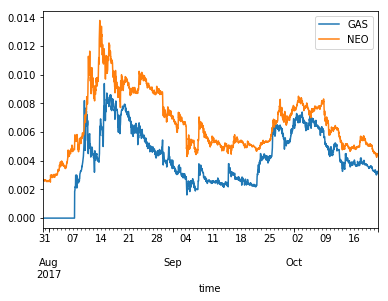

In [13]:
df_close.plot(y=['GAS', 'NEO'])

In [21]:
df_ret = df_BTC.cumsum(axis=0, skipna=True)
df_ret.head()

,BTC,ETH,XRP,BCH,LTC,DASH,XEM,BCC,NEO,XMR,...,EQT,CURE,ZRC,IOP,CRB,XTO,NOTE,DYN,TRUST,ABY
time,,,,,,,,,,,,,,,,,,,,,
2017-07-30 13:00:00,2690.93,0.07435,0.000061,0.0,0.01510,0.06617,0.000061,0.9399,0.002721,0.01556,...,0.000099,0.000051,0.000332,0.000215,0.000155,0.000017,0.000021,0.000420,0.000012,0.000001
2017-07-30 14:00:00,5419.97,0.14784,0.000121,0.0,0.02989,0.13131,0.000123,1.8798,0.005371,0.03093,...,0.000199,0.000102,0.000653,0.000427,0.000304,0.000022,0.000042,0.000845,0.000023,0.000003
2017-07-30 15:00:00,8170.22,0.22031,0.000182,0.0,0.04457,0.19569,0.000183,2.8197,0.007999,0.04618,...,0.000297,0.000155,0.000975,0.000639,0.000453,0.000027,0.000063,0.001270,0.000034,0.000004
2017-07-30 16:00:00,10900.71,0.29285,0.000242,0.0,0.05931,0.26054,0.000244,3.7596,0.010665,0.06108,...,0.000395,0.000206,0.001299,0.000853,0.000597,0.000044,0.000084,0.001695,0.000045,0.000006
2017-07-30 17:00:00,13636.28,0.36521,0.000302,0.0,0.07419,0.32476,0.000305,4.6995,0.013355,0.07609,...,0.000492,0.000256,0.001619,0.001066,0.000737,0.000061,0.000104,0.002133,0.000056,0.000007


In [22]:
df_BTC.head()

,BTC,ETH,XRP,BCH,LTC,DASH,XEM,BCC,NEO,XMR,...,EQT,CURE,ZRC,IOP,CRB,XTO,NOTE,DYN,TRUST,ABY
time,,,,,,,,,,,,,,,,,,,,,
2017-07-30 13:00:00,2690.93,0.07435,0.000061,0.0,0.01510,0.06617,0.000061,0.9399,0.002721,0.01556,...,0.000099,0.000051,0.000332,0.000215,0.000155,0.000017,0.000021,0.000420,0.000012,0.000001
2017-07-30 14:00:00,2729.04,0.07349,0.000060,0.0,0.01479,0.06514,0.000061,0.9399,0.002650,0.01537,...,0.000100,0.000052,0.000321,0.000212,0.000149,0.000005,0.000021,0.000425,0.000011,0.000001
2017-07-30 15:00:00,2750.25,0.07247,0.000060,0.0,0.01468,0.06438,0.000061,0.9399,0.002628,0.01525,...,0.000099,0.000052,0.000322,0.000213,0.000149,0.000005,0.000021,0.000425,0.000011,0.000001
2017-07-30 16:00:00,2730.49,0.07254,0.000060,0.0,0.01474,0.06485,0.000061,0.9399,0.002666,0.01490,...,0.000097,0.000051,0.000324,0.000213,0.000145,0.000017,0.000021,0.000425,0.000010,0.000001
2017-07-30 17:00:00,2735.57,0.07236,0.000060,0.0,0.01488,0.06422,0.000061,0.9399,0.002690,0.01501,...,0.000097,0.000050,0.000320,0.000213,0.000140,0.000017,0.000021,0.000438,0.000012,0.000002
